# PyCon 2019: Data Science Best Practices with pandas

## Connect Google Drive

In [93]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Load data table extension

In [94]:
%load_ext google.colab.data_table

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


## 1. Introduction to the TED Talks dataset

https://www.kaggle.com/rounakbanik/ted-talks

In [0]:
import pandas as pd

In [0]:
import matplotlib.pyplot as plt

In [0]:
ted = pd.read_csv('/content/drive/My Drive/pycon-2019-pandas-tutorial/ted.csv')

In [98]:
# each row represents a single talk
ted

comments  ...     views
0         4553  ...  47227110
1          265  ...   3200520
2          124  ...   1636292
3          200  ...   1697550
4          593  ...  12005869
...        ...  ...       ...
2545        17  ...    450430
2546         6  ...    417470
2547        10  ...    375647
2548        32  ...    419309
2549         8  ...    391721

[2550 rows x 17 columns]

In [99]:
# rows, columns
ted.shape

(2550, 17)

In [100]:
# object columns are usually strings, but can also be arbitrary Python objects (lists, dictionaries)
ted.dtypes

comments               int64
description           object
duration               int64
event                 object
film_date              int64
languages              int64
main_speaker          object
name                  object
num_speaker            int64
published_date         int64
ratings               object
related_talks         object
speaker_occupation    object
tags                  object
title                 object
url                   object
views                  int64
dtype: object

In [101]:
# count the number of missing values in each column
ted.isna().sum()

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    6
tags                  0
title                 0
url                   0
views                 0
dtype: int64

## 2. Which talks provoke the most online discussion?

In [102]:
# sort by the number of first-level comments, though this is biased in favor of older talks
ted.sort_values('comments').tail()

comments  ...     views
1787      2673  ...   2162764
201       2877  ...  21190883
644       3356  ...   3433437
0         4553  ...  47227110
96        6404  ...   4374792

[5 rows x 17 columns]

In [0]:
# correct for this bias by calculating the number of comments per view
ted['comments_per_view'] = ted.comments / ted.views

In [104]:
# interpretation: for every view of the same-sex marriage talk, there are 0.002 comments
ted.sort_values('comments_per_view').tail()

comments  ... comments_per_view
954      2492  ...          0.001360
694      1502  ...          0.001421
96       6404  ...          0.001464
803       834  ...          0.001534
744       649  ...          0.002220

[5 rows x 18 columns]

In [0]:
# make this more interpretable by inverting the calculation
ted['views_per_comment'] = ted.views / ted.comments

In [106]:
# interpretation: 1 out of every 450 people leave a comment
ted.sort_values('views_per_comment').head()

comments  ... views_per_comment
744       649  ...        450.531587
803       834  ...        651.739808
96       6404  ...        683.134291
694      1502  ...        703.886818
954      2492  ...        735.525682

[5 rows x 19 columns]

Lessons:

1. Consider the limitations and biases of your data when analyzing it
2. Make your results understandable

## 3. Visualize the distribution of comments

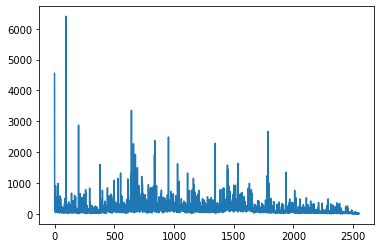

In [107]:
# line plot is not appropriate here (use it to measure something over time)
ted.comments.plot()

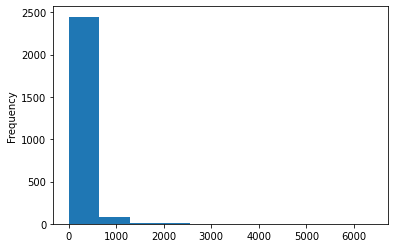

In [108]:
# histogram shows the frequency distribution of a single numeric variable
ted.comments.plot(kind='hist')

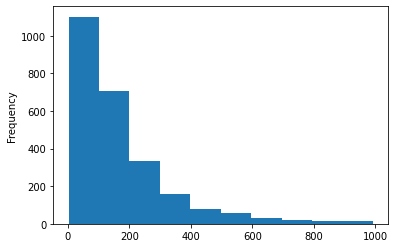

In [109]:
# modify the plot to be more informative
ted[ted.comments < 1000].comments.plot(kind='hist')

In [110]:
# check how many observations we removed from the plot
ted[ted.comments >= 1000].shape

(32, 19)

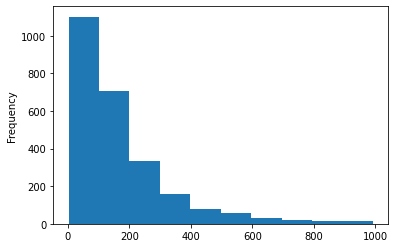

In [111]:
# can also write this using the query method
ted.query('comments < 1000').comments.plot(kind='hist')

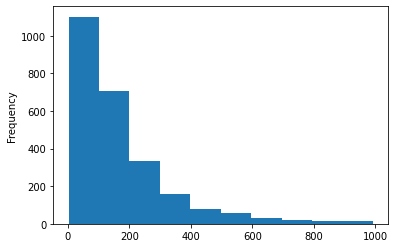

In [112]:
# can also write this using the loc accessor
ted.loc[ted.comments < 1000, 'comments'].plot(kind='hist')

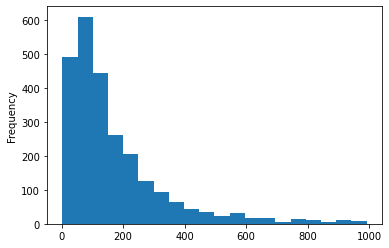

In [113]:
# increase the number of bins to see more detail
ted.loc[ted.comments < 1000, 'comments'].plot(kind='hist', bins=20)

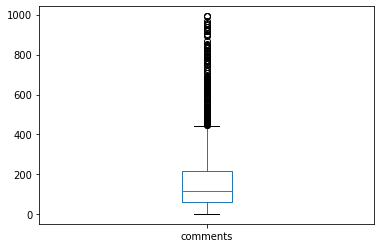

In [114]:
# boxplot can also show distributions, but it's far less useful for concentrated distributions because of outliers
ted.loc[ted.comments < 1000, 'comments'].plot(kind='box')

Lessons:

1. Choose your plot type based on the question you are answering and the data type(s) you are working with
2. Use pandas one-liners to iterate through plots quickly
3. Try modifying the plot defaults
4. Creating plots involves decision-making

## 4. Plot the number of talks that took place each year

Bonus exercise: calculate the average delay between filming and publishing

In [115]:
# event column does not always include the year
ted.event.sample(10)

763              TEDxYYC
793       TEDGlobal 2010
2448             TED2017
2321       TEDWomen 2016
1844         TEDMED 2014
137              TED2007
2079    TED Fellows 2015
14               TED2006
1137       TEDWomen 2010
1849         TEDMED 2014
Name: event, dtype: object

In [116]:
# dataset documentation for film_date says "Unix timestamp of the filming"
ted.film_date.head()

0    1140825600
1    1140825600
2    1140739200
3    1140912000
4    1140566400
Name: film_date, dtype: int64

In [117]:
# results don't look right
pd.to_datetime(ted.film_date).head()

0   1970-01-01 00:00:01.140825600
1   1970-01-01 00:00:01.140825600
2   1970-01-01 00:00:01.140739200
3   1970-01-01 00:00:01.140912000
4   1970-01-01 00:00:01.140566400
Name: film_date, dtype: datetime64[ns]

[pandas documentation for `to_datetime`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html)

In [118]:
# now the results look right
pd.to_datetime(ted.film_date, unit='s').head()

0   2006-02-25
1   2006-02-25
2   2006-02-24
3   2006-02-26
4   2006-02-22
Name: film_date, dtype: datetime64[ns]

In [0]:
ted['film_datetime'] = pd.to_datetime(ted.film_date, unit='s')

In [120]:
# verify that event name matches film_datetime for a random sample
ted[['event', 'film_datetime']].sample(5)

event film_datetime
1897  TEDGlobal 2014    2014-10-13
2348   TEDxCambridge    2016-09-29
2152         TED2016    2016-02-15
2065  TEDxProvidence    2014-09-20
404          TED2009    2009-02-05

In [121]:
# new column uses the datetime data type (this was an automatic conversion)
ted.dtypes

comments                       int64
description                   object
duration                       int64
event                         object
film_date                      int64
languages                      int64
main_speaker                  object
name                          object
num_speaker                    int64
published_date                 int64
ratings                       object
related_talks                 object
speaker_occupation            object
tags                          object
title                         object
url                           object
views                          int64
comments_per_view            float64
views_per_comment            float64
film_datetime         datetime64[ns]
dtype: object

In [122]:
# datetime columns have convenient attributes under the dt namespace
ted.film_datetime.dt.year.head()

0    2006
1    2006
2    2006
3    2006
4    2006
Name: film_datetime, dtype: int64

In [123]:
# similar to string methods under the str namespace
ted.event.str.lower().head()

0    ted2006
1    ted2006
2    ted2006
3    ted2006
4    ted2006
Name: event, dtype: object

In [124]:
# count the number of talks each year using value_counts()
ted.film_datetime.dt.year.value_counts()

2013    270
2011    270
2010    267
2012    267
2016    246
2015    239
2014    237
2009    232
2007    114
2017     98
2008     84
2005     66
2006     50
2003     33
2004     33
2002     27
1998      6
2001      5
1983      1
1991      1
1994      1
1990      1
1984      1
1972      1
Name: film_datetime, dtype: int64

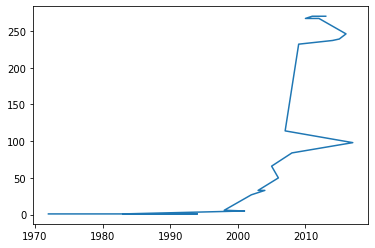

In [125]:
# points are plotted and connected in the order you give them to pandas
ted.film_datetime.dt.year.value_counts().plot()

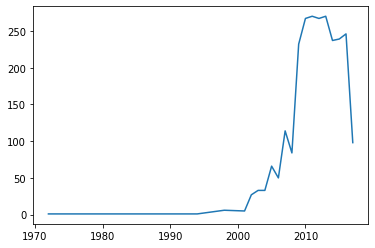

In [126]:
# need to sort the index before plotting
ted.film_datetime.dt.year.value_counts().sort_index().plot()

In [127]:
# we only have partial data for 2017
ted.film_datetime.max()

Timestamp('2017-08-27 00:00:00')

Lessons:

1. Read the documentation
2. Use the datetime data type for dates and times
3. Check your work as you go
4. Consider excluding data if it might not be relevant

## 5. What were the "best" events in TED history to attend?

In [128]:
# count the number of talks (great if you value variety, but they may not be great talks)
ted.event.value_counts().head()

TED2014    84
TED2009    83
TED2013    77
TED2016    77
TED2015    75
Name: event, dtype: int64

In [129]:
# use views as a proxy for "quality of talk"
ted.groupby('event').views.mean().head()

event
AORN Congress                  149818.0
Arbejdsglaede Live             971594.0
BBC TV                         521974.0
Bowery Poetry Club             676741.0
Business Innovation Factory    304086.0
Name: views, dtype: float64

In [130]:
# find the largest values, but we don't know how many talks are being averaged
ted.groupby('event').views.mean().sort_values().tail()

event
TEDxNorrkoping        6569493.0
TEDxCreativeCoast     8444981.0
TEDxBloomington       9484259.5
TEDxHouston          16140250.5
TEDxPuget Sound      34309432.0
Name: views, dtype: float64

In [131]:
# show the number of talks along with the mean (events with the highest means had only 1 or 2 talks)
ted.groupby('event').views.agg(['count', 'mean']).sort_values('mean').tail()

count        mean
event                               
TEDxNorrkoping         1   6569493.0
TEDxCreativeCoast      1   8444981.0
TEDxBloomington        2   9484259.5
TEDxHouston            2  16140250.5
TEDxPuget Sound        1  34309432.0

In [132]:
# calculate the total views per event
ted.groupby('event').views.agg(['count', 'mean', 'sum']).sort_values('sum').tail()

count          mean        sum
event                                         
TED2006            45  3.274345e+06  147345533
TED2015            75  2.011017e+06  150826305
TEDGlobal 2013     66  2.584163e+06  170554736
TED2014            84  2.072874e+06  174121423
TED2013            77  2.302700e+06  177307937

Lessons:

1. Think creatively for how you can use the data you have to answer your question
2. Watch out for small sample sizes

## 6. Unpack the ratings data

In [133]:
# previously, users could tag talks on the TED website (funny, inspiring, confusing, etc.)
ted.ratings.head()

0    [{'id': 7, 'name': 'Funny', 'count': 19645}, {...
1    [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...
2    [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...
3    [{'id': 3, 'name': 'Courageous', 'count': 760}...
4    [{'id': 9, 'name': 'Ingenious', 'count': 3202}...
Name: ratings, dtype: object

In [134]:
# two ways to examine the ratings data for the first talk
ted.loc[0, 'ratings']
ted.ratings[0]

"[{'id': 7, 'name': 'Funny', 'count': 19645}, {'id': 1, 'name': 'Beautiful', 'count': 4573}, {'id': 9, 'name': 'Ingenious', 'count': 6073}, {'id': 3, 'name': 'Courageous', 'count': 3253}, {'id': 11, 'name': 'Longwinded', 'count': 387}, {'id': 2, 'name': 'Confusing', 'count': 242}, {'id': 8, 'name': 'Informative', 'count': 7346}, {'id': 22, 'name': 'Fascinating', 'count': 10581}, {'id': 21, 'name': 'Unconvincing', 'count': 300}, {'id': 24, 'name': 'Persuasive', 'count': 10704}, {'id': 23, 'name': 'Jaw-dropping', 'count': 4439}, {'id': 25, 'name': 'OK', 'count': 1174}, {'id': 26, 'name': 'Obnoxious', 'count': 209}, {'id': 10, 'name': 'Inspiring', 'count': 24924}]"

In [135]:
# this is a string not a list
type(ted.ratings[0])

str

In [0]:
# convert this into something useful using Python's ast module (Abstract Syntax Tree)
import ast

In [137]:
# literal_eval() allows you to evaluate a string containing a Python literal or container
ast.literal_eval('[1, 2, 3]')

[1, 2, 3]

In [138]:
# if you have a string representation of something, you can retrieve what it actually represents
type(ast.literal_eval('[1, 2, 3]'))

list

In [139]:
# unpack the ratings data for the first talk
ast.literal_eval(ted.ratings[0])

[{'count': 19645, 'id': 7, 'name': 'Funny'},
 {'count': 4573, 'id': 1, 'name': 'Beautiful'},
 {'count': 6073, 'id': 9, 'name': 'Ingenious'},
 {'count': 3253, 'id': 3, 'name': 'Courageous'},
 {'count': 387, 'id': 11, 'name': 'Longwinded'},
 {'count': 242, 'id': 2, 'name': 'Confusing'},
 {'count': 7346, 'id': 8, 'name': 'Informative'},
 {'count': 10581, 'id': 22, 'name': 'Fascinating'},
 {'count': 300, 'id': 21, 'name': 'Unconvincing'},
 {'count': 10704, 'id': 24, 'name': 'Persuasive'},
 {'count': 4439, 'id': 23, 'name': 'Jaw-dropping'},
 {'count': 1174, 'id': 25, 'name': 'OK'},
 {'count': 209, 'id': 26, 'name': 'Obnoxious'},
 {'count': 24924, 'id': 10, 'name': 'Inspiring'}]

In [140]:
# now we have a list (of dictionaries)
type(ast.literal_eval(ted.ratings[0]))

list

In [0]:
# define a function to convert an element in the ratings Series from string to list
def str_to_list(ratings_str):
    return ast.literal_eval(ratings_str)

In [142]:
# test the function
str_to_list(ted.ratings[0])

[{'count': 19645, 'id': 7, 'name': 'Funny'},
 {'count': 4573, 'id': 1, 'name': 'Beautiful'},
 {'count': 6073, 'id': 9, 'name': 'Ingenious'},
 {'count': 3253, 'id': 3, 'name': 'Courageous'},
 {'count': 387, 'id': 11, 'name': 'Longwinded'},
 {'count': 242, 'id': 2, 'name': 'Confusing'},
 {'count': 7346, 'id': 8, 'name': 'Informative'},
 {'count': 10581, 'id': 22, 'name': 'Fascinating'},
 {'count': 300, 'id': 21, 'name': 'Unconvincing'},
 {'count': 10704, 'id': 24, 'name': 'Persuasive'},
 {'count': 4439, 'id': 23, 'name': 'Jaw-dropping'},
 {'count': 1174, 'id': 25, 'name': 'OK'},
 {'count': 209, 'id': 26, 'name': 'Obnoxious'},
 {'count': 24924, 'id': 10, 'name': 'Inspiring'}]

In [143]:
# Series apply method applies a function to every element in a Series and returns a Series
ted.ratings.apply(str_to_list).head()

0    [{'id': 7, 'name': 'Funny', 'count': 19645}, {...
1    [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...
2    [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...
3    [{'id': 3, 'name': 'Courageous', 'count': 760}...
4    [{'id': 9, 'name': 'Ingenious', 'count': 3202}...
Name: ratings, dtype: object

In [144]:
# lambda is a shorter alternative
ted.ratings.apply(lambda x: ast.literal_eval(x)).head()

0    [{'id': 7, 'name': 'Funny', 'count': 19645}, {...
1    [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...
2    [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...
3    [{'id': 3, 'name': 'Courageous', 'count': 760}...
4    [{'id': 9, 'name': 'Ingenious', 'count': 3202}...
Name: ratings, dtype: object

In [145]:
# an even shorter alternative is to apply the function directly (without lambda)
ted.ratings.apply(ast.literal_eval).head()

0    [{'id': 7, 'name': 'Funny', 'count': 19645}, {...
1    [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...
2    [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...
3    [{'id': 3, 'name': 'Courageous', 'count': 760}...
4    [{'id': 9, 'name': 'Ingenious', 'count': 3202}...
Name: ratings, dtype: object

In [0]:
ted['ratings_list'] = ted.ratings.apply(lambda x: ast.literal_eval(x))

In [147]:
# check that the new Series looks as expected
ted.ratings_list[0]

[{'count': 19645, 'id': 7, 'name': 'Funny'},
 {'count': 4573, 'id': 1, 'name': 'Beautiful'},
 {'count': 6073, 'id': 9, 'name': 'Ingenious'},
 {'count': 3253, 'id': 3, 'name': 'Courageous'},
 {'count': 387, 'id': 11, 'name': 'Longwinded'},
 {'count': 242, 'id': 2, 'name': 'Confusing'},
 {'count': 7346, 'id': 8, 'name': 'Informative'},
 {'count': 10581, 'id': 22, 'name': 'Fascinating'},
 {'count': 300, 'id': 21, 'name': 'Unconvincing'},
 {'count': 10704, 'id': 24, 'name': 'Persuasive'},
 {'count': 4439, 'id': 23, 'name': 'Jaw-dropping'},
 {'count': 1174, 'id': 25, 'name': 'OK'},
 {'count': 209, 'id': 26, 'name': 'Obnoxious'},
 {'count': 24924, 'id': 10, 'name': 'Inspiring'}]

In [148]:
# each element in the Series is a list
type(ted.ratings_list[0])

list

In [149]:
# data type of the new Series is object
ted.ratings_list.dtype

dtype('O')

In [150]:
# object is not just for strings
ted.dtypes

comments                       int64
description                   object
duration                       int64
event                         object
film_date                      int64
languages                      int64
main_speaker                  object
name                          object
num_speaker                    int64
published_date                 int64
ratings                       object
related_talks                 object
speaker_occupation            object
tags                          object
title                         object
url                           object
views                          int64
comments_per_view            float64
views_per_comment            float64
film_datetime         datetime64[ns]
ratings_list                  object
dtype: object

Lessons:

1. Pay attention to data types in pandas
2. Use apply any time it is necessary

## 7. Count the total number of ratings received by each talk

Bonus exercises:

- for each talk, calculate the percentage of ratings that were negative
- for each talk, calculate the average number of ratings it received per day since it was published

In [151]:
# expected result (for each talk) is sum of count
ted.ratings_list[0]

[{'count': 19645, 'id': 7, 'name': 'Funny'},
 {'count': 4573, 'id': 1, 'name': 'Beautiful'},
 {'count': 6073, 'id': 9, 'name': 'Ingenious'},
 {'count': 3253, 'id': 3, 'name': 'Courageous'},
 {'count': 387, 'id': 11, 'name': 'Longwinded'},
 {'count': 242, 'id': 2, 'name': 'Confusing'},
 {'count': 7346, 'id': 8, 'name': 'Informative'},
 {'count': 10581, 'id': 22, 'name': 'Fascinating'},
 {'count': 300, 'id': 21, 'name': 'Unconvincing'},
 {'count': 10704, 'id': 24, 'name': 'Persuasive'},
 {'count': 4439, 'id': 23, 'name': 'Jaw-dropping'},
 {'count': 1174, 'id': 25, 'name': 'OK'},
 {'count': 209, 'id': 26, 'name': 'Obnoxious'},
 {'count': 24924, 'id': 10, 'name': 'Inspiring'}]

In [0]:
# start by building a simple function
def get_num_ratings(list_of_dicts):
    return list_of_dicts[0]

In [153]:
# pass it a list, and it returns the first element in the list, which is a dictionary
get_num_ratings(ted.ratings_list[0])

{'count': 19645, 'id': 7, 'name': 'Funny'}

In [0]:
# modify the function to return the vote count
def get_num_ratings(list_of_dicts):
    return list_of_dicts[0]['count']

In [155]:
# pass it a list, and it returns a value from the first dictionary in the list
get_num_ratings(ted.ratings_list[0])

19645

In [0]:
# modify the function to get the sum of count
def get_num_ratings(list_of_dicts):
    num = 0
    for d in list_of_dicts:
        num = num + d['count']
    return num

In [157]:
# looks about right
get_num_ratings(ted.ratings_list[0])

93850

In [158]:
# check with another record
ted.ratings_list[1]

[{'count': 544, 'id': 7, 'name': 'Funny'},
 {'count': 139, 'id': 3, 'name': 'Courageous'},
 {'count': 62, 'id': 2, 'name': 'Confusing'},
 {'count': 58, 'id': 1, 'name': 'Beautiful'},
 {'count': 258, 'id': 21, 'name': 'Unconvincing'},
 {'count': 113, 'id': 11, 'name': 'Longwinded'},
 {'count': 443, 'id': 8, 'name': 'Informative'},
 {'count': 413, 'id': 10, 'name': 'Inspiring'},
 {'count': 132, 'id': 22, 'name': 'Fascinating'},
 {'count': 56, 'id': 9, 'name': 'Ingenious'},
 {'count': 268, 'id': 24, 'name': 'Persuasive'},
 {'count': 116, 'id': 23, 'name': 'Jaw-dropping'},
 {'count': 131, 'id': 26, 'name': 'Obnoxious'},
 {'count': 203, 'id': 25, 'name': 'OK'}]

In [159]:
# looks about right
get_num_ratings(ted.ratings_list[1])

2936

In [160]:
# apply it to every element in the Series
ted.ratings_list.apply(get_num_ratings).head()

0    93850
1     2936
2     2824
3     3728
4    25620
Name: ratings_list, dtype: int64

In [161]:
# another alternative is to use a generator expression
sum((d['count'] for d in ted.ratings_list[0]))

93850

In [162]:
# use lambda to apply this method
ted.ratings_list.apply(lambda x: sum((d['count'] for d in x))).head()

0    93850
1     2936
2     2824
3     3728
4    25620
Name: ratings_list, dtype: int64

In [163]:
# another alternative is to use pd.DataFrame()
pd.DataFrame(ted.ratings_list[0])['count'].sum()

93850

In [0]:
# use lambda to apply this method
ted.ratings_list.apply(lambda x: pd.DataFrame(x)['count'].sum()).head()

In [0]:
ted['num_ratings'] = ted.ratings_list.apply(get_num_ratings)

In [0]:
# do one more check
ted.num_ratings.describe()

Lessons:

1. Write your code in small chunks, and check your work as you go
2. Lambda is best for simple functions

## 8. Which occupations deliver the funniest TED talks on average?

Bonus exercises:

- for each talk, calculate the most frequent rating
- for each talk, clean the occupation data so that there's only one occupation per talk

### Step 1: Count the number of funny ratings

In [0]:
# "Funny" is not always the first dictionary in the list
ted.ratings_list.head()

In [0]:
# check ratings (not ratings_list) to see if "Funny" is always a rating type
ted.ratings.str.contains('Funny').value_counts()

In [0]:
# write a custom function
def get_funny_ratings(list_of_dicts):
    for d in list_of_dicts:
        if d['name'] == 'Funny':
            return d['count']

In [0]:
# examine a record in which "Funny" is not the first dictionary
ted.ratings_list[3]

In [0]:
# check that the function works
get_funny_ratings(ted.ratings_list[3])

In [0]:
# apply it to every element in the Series
ted['funny_ratings'] = ted.ratings_list.apply(get_funny_ratings)
ted.funny_ratings.head()

In [0]:
# check for missing values
ted.funny_ratings.isna().sum()

### Step 2: Calculate the percentage of ratings that are funny

In [0]:
ted['funny_rate'] = ted.funny_ratings / ted.num_ratings

In [0]:
# "gut check" that this calculation makes sense by examining the occupations of the funniest talks
ted.sort_values('funny_rate').speaker_occupation.tail(20)

In [0]:
# examine the occupations of the least funny talks
ted.sort_values('funny_rate').speaker_occupation.head(20)

### Step 3: Analyze the funny rate by occupation

In [0]:
# calculate the mean funny rate for each occupation
ted.groupby('speaker_occupation').funny_rate.mean().sort_values().tail()

In [0]:
# however, most of the occupations have a sample size of 1
ted.speaker_occupation.describe()

### Step 4: Focus on occupations that are well-represented in the data

In [0]:
# count how many times each occupation appears
ted.speaker_occupation.value_counts()

In [0]:
# value_counts() outputs a pandas Series, thus we can use pandas to manipulate the output
occupation_counts = ted.speaker_occupation.value_counts()
type(occupation_counts)

In [0]:
# show occupations which appear at least 5 times
occupation_counts[occupation_counts >= 5]

In [0]:
# save the index of this Series
top_occupations = occupation_counts[occupation_counts >= 5].index
top_occupations

### Step 5: Re-analyze the funny rate by occupation (for top occupations only)

In [0]:
# filter DataFrame to include only those occupations
ted_top_occupations = ted[ted.speaker_occupation.isin(top_occupations)]
ted_top_occupations.shape

In [0]:
# redo the previous groupby
ted_top_occupations.groupby('speaker_occupation').funny_rate.mean().sort_values()

Lessons:

1. Check your assumptions about your data
2. Check whether your results are reasonable
3. Take advantage of the fact that pandas operations often output a DataFrame or a Series
4. Watch out for small sample sizes
5. Consider the impact of missing data
6. Data scientists are hilarious